# Demonstration and results - Hyperheuristic
## Single run
All instances included in the program are Augerat instances

In [1]:
import pandas
import matplotlib.pyplot as plt
instance_data = pandas.read_csv("P-n20-k2_info_run.csv").truncate(before  = 4)
instance_data.keys()

hyper_choice = ["Hyper choice BP","Hyper choice BE1","Hyper choice BE2","Hyper choice Exact"]
non_basic_columns = ["Active path BP","Active path BE1","Active path BE2","Active path Exact", "Total active paths"]
accepted_columns = ["Accepted columns BP","Accepted columns BE1","Accepted columns BE2","Accepted columns Exact"]
quality = ["Quality BP","Quality BE1","Quality BE2","Quality Exact"]
labels = ["BP","BE1","BE2","Exact"]
selection_score = ["Selection score BP","Selection score BE1","Selection score BE2","Selection score Exact"]

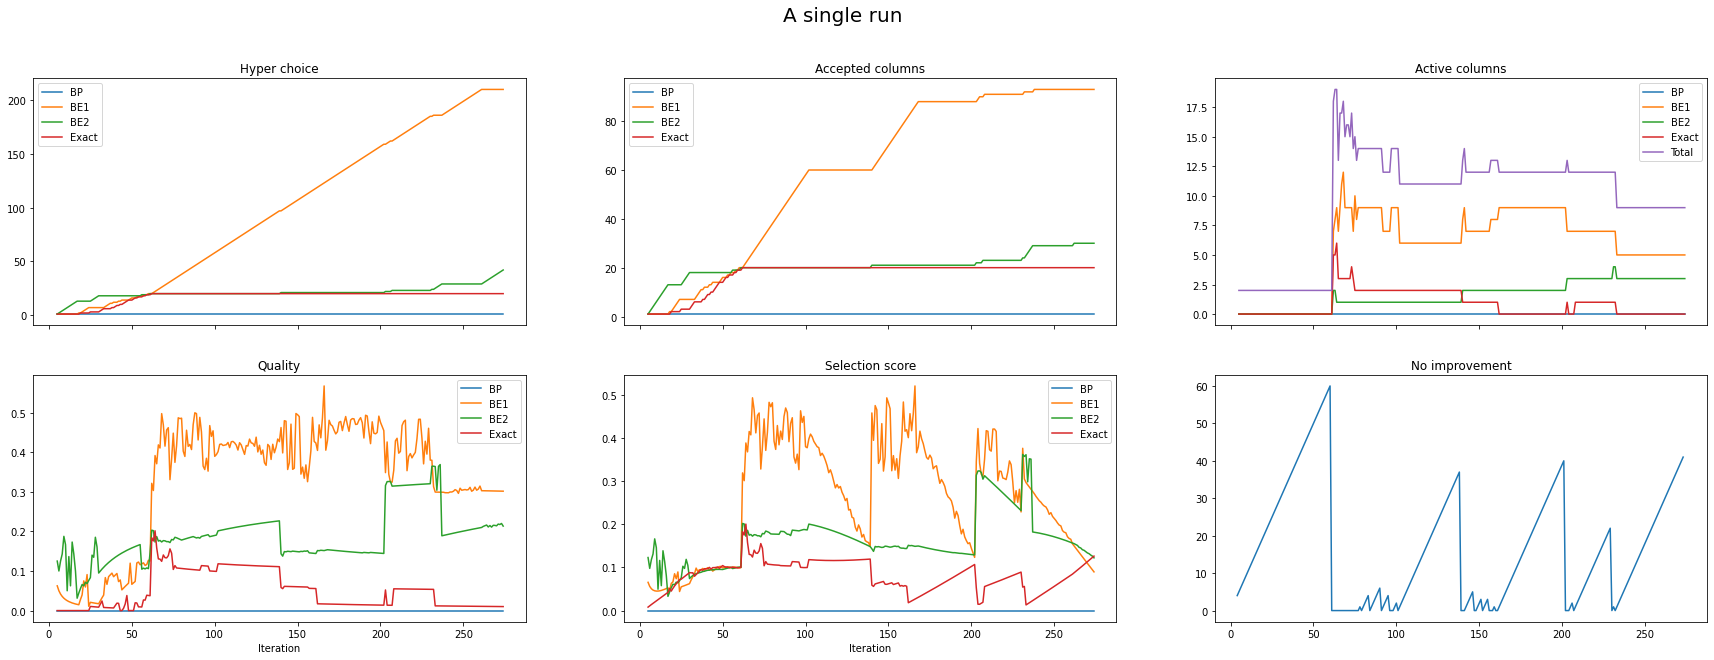

In [2]:
fig1, ax1 = plt.subplots(ncols= 3, nrows = 2, sharey = False, sharex = True, figsize = (30,10))
fig1.suptitle("A single run", size = 20)
instance_data.plot(ax = ax1[0,0], x = "Iteration", y = hyper_choice, label = labels, title = "Hyper choice")
instance_data.plot(ax = ax1[0,1], x = "Iteration", y = accepted_columns, title = "Accepted columns", label= ["BP","BE1","BE2","Exact"])
instance_data.plot(ax = ax1[0,2], x = "Iteration", y = non_basic_columns, title = "Active columns", label = ["BP","BE1","BE2","Exact", "Total"])
instance_data.plot(ax = ax1[1,0],x = "Iteration", y = quality, title = "Quality", label= ["BP","BE1","BE2","Exact"])
instance_data.plot(ax = ax1[1,1], x = "Iteration", y = selection_score, title = "Selection score", label= ["BP","BE1","BE2","Exact"])
instance_data["No improvement"].plot(ax = ax1[1,2], title = "No improvement")
fig1.show()


Hyper choice is the choice produced by the high level heuristic. 
Accepted columns are the generated columns with negative reduced cost. 
Active columns are the distribution of active columns in the current restriced master. 
Quality determines the rank of the heuristic, and is defined as the weighted average of the last normalised runtime of a given heuristic and the proportion of active columns. 
Selection score is the score by which the heuristics are selected. It is defined as the convex combination of the quality and a diversification term, the convex combination is determined adaptively using No improvement.  
No improvement is defined as objective stagnation or an iteration where a negative column is not produced.





The algorithm is working as expected for instance P-n20-k2_info_run. The interplay between the Quality, Selection score and No improvements graphs shows that the selection score is determined by both quality and the diversification term, which reduces the quality component in the selection when the algorithm stagnates. The adaptive scheme ensures that a normalised spreading term dominates, to try possibly underutilised heuristics. Under the current performance metric the BestEdges1 pricing strategy often dominates the quality for many runs (e.g.  A-n33-k6, P-n40-k7). For many instances (e.g. P-n50-k7, A-n32-k5) BestEdges2 are the most selected. This can vary from run to run as well. In the case where one heuristic dominates the active columns, it has top tank. 



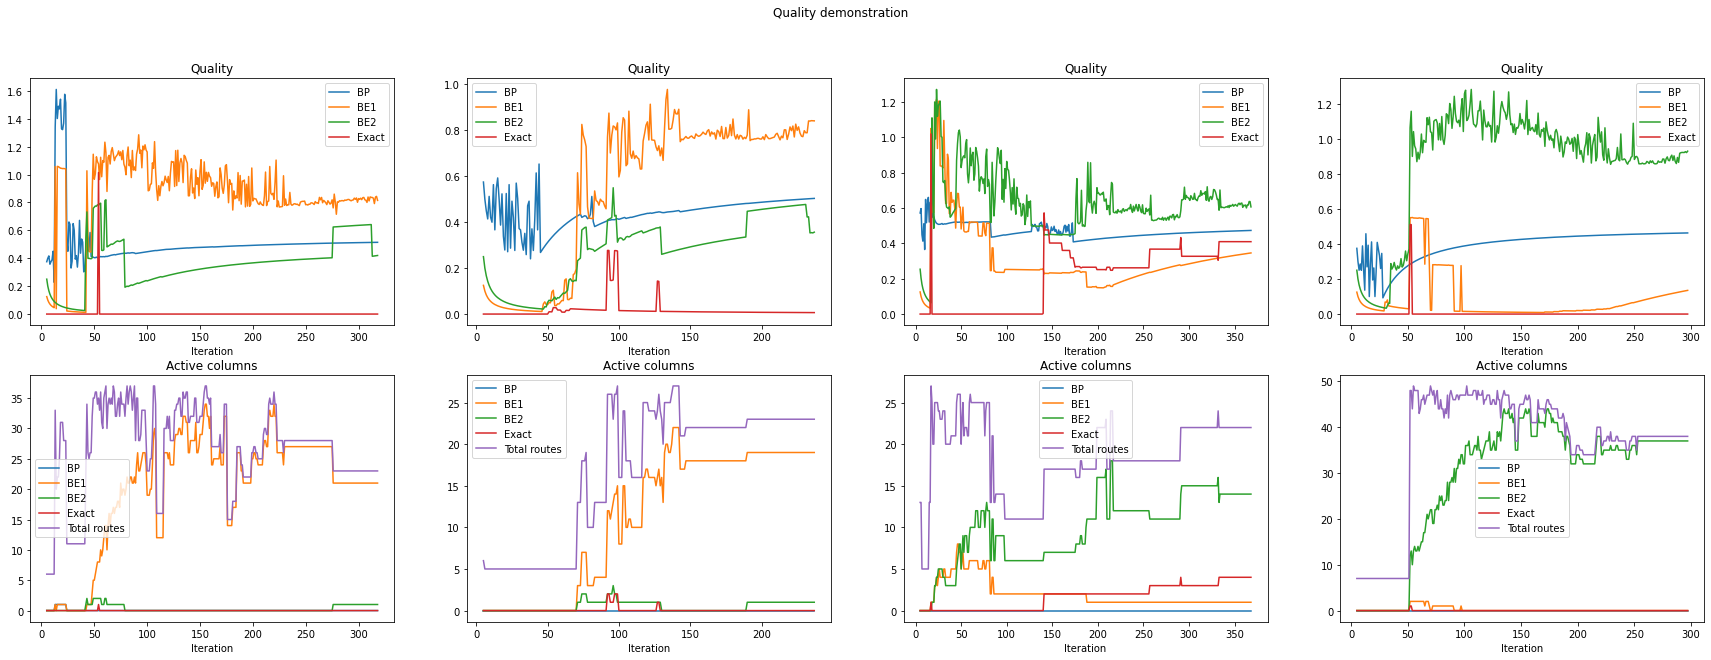

In [3]:
A_n32_k5 = pandas.read_csv("A-n32-k5_info_run_BE1_selected.csv").truncate(before  = 4)
A_n33_k5 = pandas.read_csv("A-n33-k5_info_run_BE1_selected.csv").truncate(before  = 4)
P_n40_k5 = pandas.read_csv("P-n40-k5_info_run_BE1_selected.csv").truncate(before  = 4)
A_n33_k6 = pandas.read_csv("A-n33-k6_info_run_BE2_selected.csv").truncate(before  = 4)
P_n50_k7 = pandas.read_csv("P-n50-k7_info_run_BE2_selected.csv").truncate(before  = 4)

fig2, ax2 = plt.subplots(ncols = 4, nrows = 2, figsize = (30,10))
fig2.suptitle("Quality demonstration")
P_n40_k5.plot(ax = ax2[0,0], x = "Iteration", y = quality, title = "Quality", label = ["BP","BE1","BE2","Exact"])
A_n33_k5.plot(ax = ax2[0,1], x = "Iteration", y = quality, title = "Quality", label = ["BP","BE1","BE2","Exact"])
A_n32_k5.plot(ax = ax2[0,2], x = "Iteration", y = quality, title = "Quality", label = ["BP","BE1","BE2","Exact"])
P_n50_k7.plot(ax = ax2[0,3], x = "Iteration", y = quality, title = "Quality", label = ["BP","BE1","BE2","Exact"])
P_n40_k5.plot(ax = ax2[1,0], x = "Iteration", y = non_basic_columns, title = "Active columns", label = ["BP","BE1","BE2","Exact", "Total routes"])
A_n33_k5.plot(ax = ax2[1,1], x = "Iteration", y = non_basic_columns, title = "Active columns", label = ["BP","BE1","BE2","Exact", "Total routes"])
A_n32_k5.plot(ax = ax2[1,2], x = "Iteration", y = non_basic_columns, title = "Active columns", label = ["BP","BE1","BE2","Exact", "Total routes"])
P_n50_k7.plot(ax = ax2[1,3], x = "Iteration", y = non_basic_columns, title = "Active columns", label = ["BP","BE1","BE2","Exact", "Total routes"])
fig2.show()


The BestPaths strategy performs moderately well with respect to the performance metric. It has the fastest runtime. However, on all instances it rarely dominates the number of active routes at a given time. An active route being a non-basic route in the current restriced master.  The other heuristic strategies are rarely in the same position. An example is a run of A-n32-k5.vrp seen below, where none of the 50 attempted BestPaths moves resulted in a column with negative reduced cost. Another example is shown in the result section, on instance P-n21-k2. 



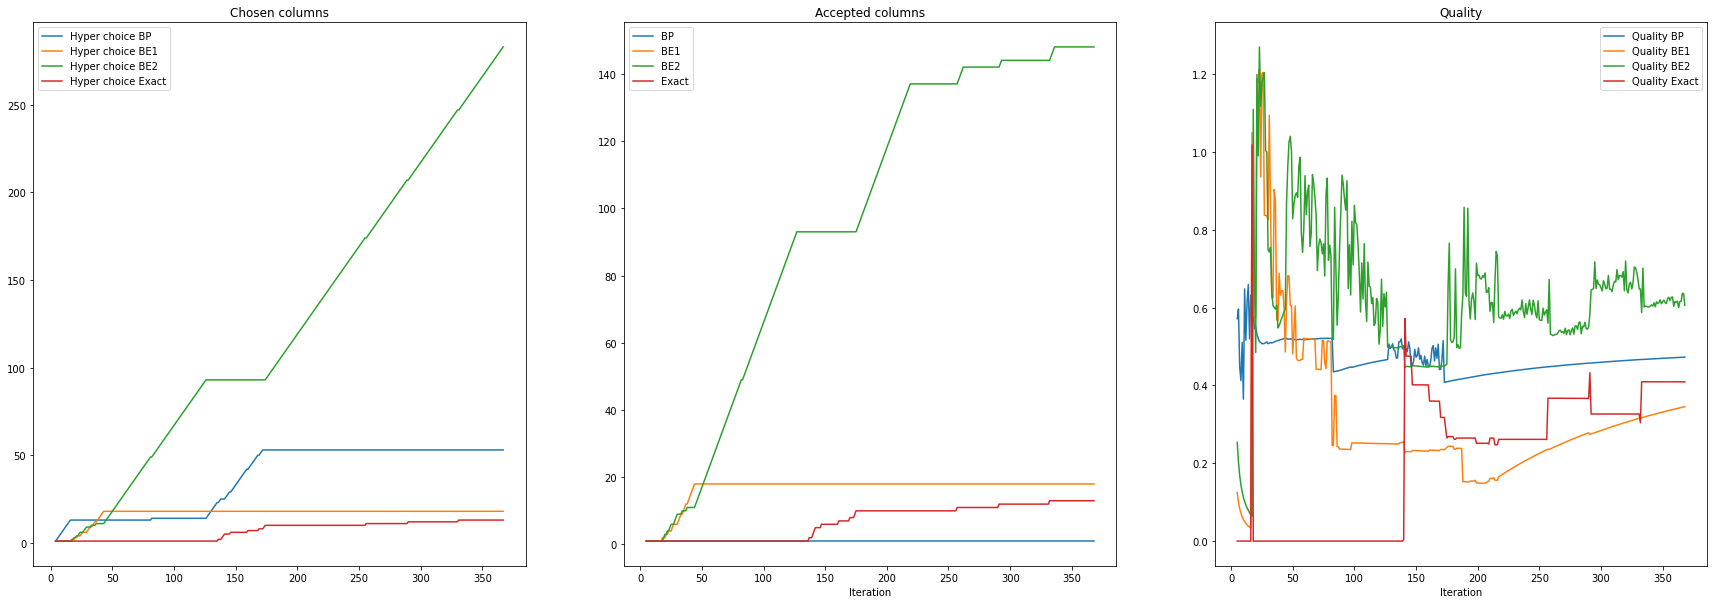

In [4]:

fig3, ax3 = plt.subplots(ncols = 3, nrows = 1, figsize = (30,10))
A_n32_k5.plot(ax = ax3[0], y = hyper_choice, title = "Chosen columns"),
A_n32_k5.plot(ax = ax3[1], x = "Iteration", y = accepted_columns, title = "Accepted columns", label = ["BP","BE1","BE2","Exact"]),
A_n32_k5.plot(ax = ax3[2], x = "Iteration", y = quality, title = "Quality")
fig3.show()


This behavior is why the performance metric was changed from mainly considering runtime in the "Relative improvement" option, to the second approach "Weighted average". The Active columns term is thought to work as a quality test for the produced columns. 

## Results

For runtime results, see the table below. The strategies represented in the table are BestEdges1, Exact and Hyper and the instances are from the Augerat test sets.  


In [21]:
cvrp1 = pandas.read_csv("cvrp_wa_w0=0.5_w1=0.5.csv")
group1 = cvrp1.groupby("Instance")

min_index = []
for i in group1.groups:
    min_index.append(group1.get_group(i)["Runtime"].idxmin(axis = 0))
min_index

cvrp1.filter(min_index, axis = 0)

,Instance,Pricing strategy,Subproblem type,Dived,Greedy,Runtime,# of iterations,Integrality gap,Optimality gap,Optimal,w0,w1,w2
22,A-n32-k5.vrp,Hyper,cspy,False,True,6913.850628,269,7.024380,3.698980,False,0.5,0.5,0.3
21,A-n33-k5.vrp,BestEdges1,cspy,False,True,4101.498436,127,1.051900,0.151286,False,0.5,0.5,0.3
34,A-n33-k6.vrp,Hyper,cspy,False,True,2206.869215,190,2.598146,0.673854,False,0.5,0.5,0.3
25,A-n34-k5.vrp,Hyper,cspy,False,True,6155.374030,304,6.260605,1.413882,False,0.5,0.5,0.3
24,A-n37-k5.vrp,BestEdges1,cspy,False,True,15030.585108,242,1.911932,0.448430,False,0.5,0.5,0.3
32,A-n37-k6.vrp,Exact,cspy,False,True,43411.134799,116,5.371455,2.845100,False,0.5,0.5,0.3
31,A-n39-k5.vrp,Hyper,cspy,False,True,39790.642288,473,4.029871,1.094891,False,0.5,0.5,0.3
27,A-n39-k6.vrp,BestEdges1,cspy,False,True,27955.746285,305,3.191769,0.000000,True,0.5,0.5,0.3
50,P-n16-k8.vrp,Hyper,cspy,False,True,3.075270,22,2.040816,0.000000,True,0.5,0.5,0.3
7,P-n19-k2.vrp,BestEdges1,cspy,False,True,150.745466,54,7.202798,3.301887,False,0.5,0.5,0.3


The hyper heuristic generally performs on par with BestEdges1 and better than Exact. On smaller to medium-sized instances from the P-set, BestEdges1 outperforms Hyper. On larger instances, the diversification built-in in Hyper seems to aid the search. It performs better than BE1 on many of the larger instances from the A-set and P-set. 


## Playing with the parameters
Two parameter setups have currently been tested with the weighted average approach. Setup1 weighs active columns 0.5 and runtime 0.25, vice versa for setup2.
Decreasing the norm runtime weight improved the performance on all instances. Determining the optimal parameters can give a better hyper heuristic set-up than currently implemented. 


In [20]:
setup1  = pandas.read_csv("cvrp_wa_w0=0.5_w1=0.25.csv")
setup2 = pandas.read_csv("cvrp_wa_w0=0.25_w1=0.5.csv")
setup1_BP = pandas.read_csv("cvrp_wa_w0=0.5_w1=0.25_bestpaths_excluded.csv")
setup2_BP = pandas.read_csv("cvrp_wa_w0=0.25_w1=0.5_bestpaths_excluded.csv")


setup1
#setup2


,Instance,Pricing strategy,Subproblem type,Dived,Greedy,Runtime,# of iterations,Integrality gap,Optimality gap,Optimal,w0,w1,w2
0,P-n16-k8.vrp,Hyper,cspy,False,True,5.111106,34,2.040816,0.000000,True,0.25,0.5,0.3
1,P-n16-k8.vrp,Hyper,cspy,False,True,8.181503,28,2.040816,0.000000,True,0.25,0.5,0.3
2,P-n19-k2.vrp,Hyper,cspy,False,True,175.847635,168,7.202798,3.301887,False,0.25,0.5,0.3
3,P-n20-k2.vrp,Hyper,cspy,False,True,461.117250,408,4.388714,2.777778,False,0.25,0.5,0.3
4,P-n21-k2.vrp,Hyper,cspy,False,True,605.715663,515,4.081634,4.739336,False,0.25,0.5,0.3
5,A-n33-k5.vrp,Hyper,cspy,False,True,3903.730665,615,1.434539,0.605144,False,0.25,0.5,0.3
6,A-n32-k5.vrp,Hyper,cspy,False,True,4064.730923,948,7.721406,4.209184,False,0.25,0.5,0.3


For both settings it was attempted to remove BestPaths from the heuristic pool altogether, for reasons explained above. Removing BestPaths for setup1 gives speed-up for all instances. For setup 2, this is not the case. Setup2_BP (BP removed) is slower, but produces an optimal solution for instance P-n21-k2. 

In [19]:
setup1_BP
#setup2_BP


,Instance,Pricing strategy,Subproblem type,Dived,Greedy,Runtime,# of iterations,Integrality gap,Optimality gap,Optimal,w0,w1,w2
0,P-n20-k2.vrp,Hyper,cspy,False,True,517.094918,274,4.095030,2.777778,False,0.25,0.5,0.3
1,P-n21-k2.vrp,Hyper,cspy,False,True,759.600417,387,0.000000,0.000000,True,0.25,0.5,0.3
2,A-n32-k5.vrp,Hyper,cspy,False,True,4496.487259,385,7.721406,4.209184,False,0.25,0.5,0.3


Shown below are the runs for the selected and accepted solutions by each heuristic plotted. The instance is P-n21-k2. 

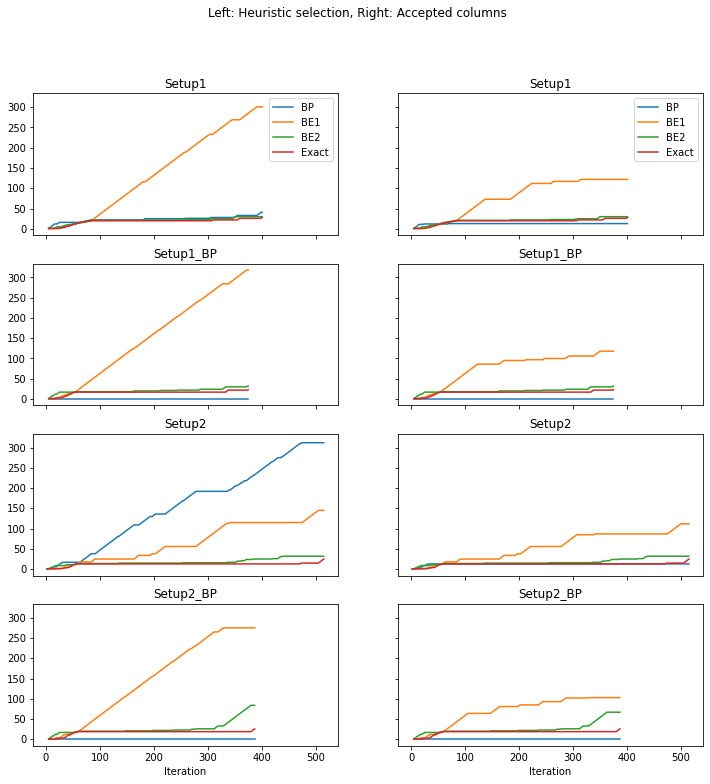

In [8]:
P_n21_k2_setup1= pandas.read_csv("P-n21-k2_info_run_setup1.csv").truncate(before  = 4)
P_n21_k2_setup1_BP = pandas.read_csv("P-n21-k2_info_run_setup1_BP.csv").truncate(before  = 4)
P_n21_k2_setup1_BP = pandas.read_csv("P-n21-k2_info_run.csv").truncate(before  = 4)
P_n21_k2_setup2= pandas.read_csv("P-n21-k2_info_run_setup2.csv").truncate(before  = 4)
P_n21_k2_setup2_BP= pandas.read_csv("P-n21-k2_info_run_setup2_BP.csv").truncate(before  = 4)

fig, axes = plt.subplots(nrows=4, ncols = 2, figsize = (12,12), sharex=True, sharey = True)
fig.suptitle("Left: Heuristic selection, Right: Accepted columns")
P_n21_k2_setup1.plot(ax = axes[0,1], x = "Iteration", y = accepted_columns, label = labels, title = "Setup1")
P_n21_k2_setup1_BP.plot(ax = axes[1,1], x = "Iteration", y = accepted_columns, legend = False,title = "Setup1_BP")
P_n21_k2_setup2.plot(ax = axes[2,1], x = "Iteration", y = accepted_columns, legend = False, title = "Setup2")
P_n21_k2_setup2_BP.plot(ax = axes[3,1], x = "Iteration", y = accepted_columns, legend = False,title = "Setup2_BP")
P_n21_k2_setup1.plot(ax = axes[0,0], x = "Iteration", y = hyper_choice, label = labels, title = "Setup1")
P_n21_k2_setup1_BP.plot(ax = axes[1,0], x = "Iteration", y = hyper_choice, legend = False,title = "Setup1_BP")
P_n21_k2_setup2.plot(ax = axes[2,0], x = "Iteration", y = hyper_choice, legend = False, title = "Setup2")
P_n21_k2_setup2_BP.plot(ax = axes[3,0], x = "Iteration", y = hyper_choice, legend = False,title = "Setup2_BP")
fig.show()


#P_n21_k2_setup2_BP["Iteration"]

From the figure, it is clear that Setup2 is more sensitive to runtime score. BP dominates the selection for most of the search, and removing it leads to a change in the choice pattern where BE1 dominates until the very end, where BE2 and Exact increases. In contrast, the choice patterns for setup1 and setup1_BP are similar. The results from the setup tables are counterintuitive in light of these plots, in that the run with the same choice pattern has improvement in run time, while for setup2 removing the BP choices causes the algorithm to performs worse. One explanation is that both runs benefit from diversification, but the performance metric pushes BestEdges1 to dominate the search, as explained in the Quality demonstration. A weakness with the current performance metric is that it can lead to a self-fulfilling pattern where columns accepted lead indirectly lead to high quality score, since the restricted master have few other columns to choose from. This pattern could be represented in the above runs, and may not be optimal. Currently, the diversification is prevalent when the algorithm is stagnating. 

Another behavior observed for many instances are prolonged periods where there is no decrease in the objective function. This can often followed by a short period of objective decrease, after which the search again stagnates. 


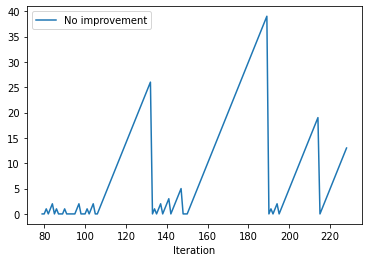

In [9]:
last = pandas.read_csv("P-n60-k15_info_run.csv")
last = last.tail(150)
last.plot(x = "Iteration", y = "No improvement")

This behavior is also seen for the above demonstration on instance P-n20-k2. For future work we consider re-doing the simple adaptive scheme to take into account the stagnation-history of a given run, and speed up the diversification after prolonged stagnation periods. Similarly, slow down the adaptive step if the periods are short. Currently, the adaptive scheme decreases with constant step size. 
